<h1>Testing and Documentation Notebook for Cellular Automaton Using Inheritance from Numpy NDArray</h1>
<p>This document is for testing of a cellular automaton class which inherits much of its functionality from the Numpy module.  The class enables use of the array opperations (implemented in C) which should make the execution speed better.</p>
<h2>Initialization</h2>

In [1]:
from CellularAutomaton import *
from IPython.display import display
import inspect

from math import *
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

from matplotlib import animation
matplotlib.rc('animation', html='html5')

goldenratio=1/2*(1+sqrt(5))
fsx=7
fsy=fsx/goldenratio

<h3>Functions to help with testing</h3>

In [2]:
MyDtype = numpy.dtype([('Value','f'),('State',bool)])

def setstates(grid, rows, columns, states):
    i=0
    for y in range(rows):
        for x in range(columns):
            grid["State"][y][x]=states[i]
            i = i + 1
    grid.SetValue()
    grid.SetBoundary()

<h2>Cellular Automaton</h2>
<p>Some good reasources for cellular automaton simulations are:
<ul>
<li><a href=http://web.stanford.edu/~cdebs/GameOfLife/>A page</a> describing Conway's Game of Life and the origins of cellular automaton</li>
<li>Well, right now I guess I just have this one link.</li>
</ul></p>
<h2>Class Structure</h2>
<p>The class CAGrid (or cellular automaton grid) inherts a numpy ndarry array and adds extra functionality to specialize the array for cellular automaton simulations.  In this implementation, each cell element is an array location.  The class also creates arrays for the neighbors in each direction.  In addition to the stucture and functionality provided by numpy arrays, the array stucture should allow for faster simulation calcuations as array operatioins can be executed in c using BLAS subroutines, rather than interperted python interation over cellular automaton cells.  Let us look at the structure of the class.  We begin with the class doc string.</p>

In [3]:
print(inspect.getdoc(CAGrid))

Class for implementing cellular automaton grid simulations.

Provides a framework for implementing 2D cellular automaton (CA) simulations using numpy arrays.
Each instance of the class has a numpy array for the cell data.  The class automatically creates
boundary cells surrounding the simulation grid.  I also creates views into the simulation grid
for use with numpy array operations for calculation.

Since this class inherits numpy.ndarray, several unique approaches must be used (espicially for
class instance creation.)  The document at
https://docs.scipy.org/doc/numpy/user/basics.subclassing.html explains using ndarray as a
subclass and these special approaches.

Also important in the concept of an array view.  A view to an array does not use new data in memory, but simply
'views' the data which already exists.  Because of this efficiency, this class creates many views into the
grid.  These views can be used later for efficient calculation through numpy calls rather than iterating ove

<h2>Test a 3 x 3 Behavior</h2>
<h3>Checker Board</h3>

In [ ]:
rows = 3
columns = 3
MyGrid3_3=CAGrid((rows,columns),MyDtype)
setstates(MyGrid3_3, rows, columns, (0,1,0,1,0,1,0,1,0))
MyAxes.matshow(MyGrid3_3['Value'])
MyFigure
print(MyGrid3_3['State'])
print(MyGrid3_3['Value'])

In [ ]:
MyAxes.matshow(MyGrid3_3['State'])
MyFigure

In [ ]:
MyGrid3_3.Update()
print(MyGrid3_3['State'])
print(MyGrid3_3['Value'])

In [ ]:
MyGrid3_3.Update()
print(MyGrid3_3['State'])
print(MyGrid3_3['Value'])

<h3>Line Continous</h3>

In [ ]:
rows = 3
columns = 3
MyGrid3_3=CAGrid((rows,columns),MyDtype)
setstates(MyGrid3_3, rows, columns, (0,0,0,1,1,1,0,0,0))
print(MyGrid3_3['State'])
print(MyGrid3_3['Value'])

In [ ]:
MyGrid3_3.Update()
print(MyGrid3_3['State'])
print(MyGrid3_3['Value'])

In [ ]:
MyGrid3_3.Update()
print(MyGrid3_3['State'])
print(MyGrid3_3['Value'])

<h3>Blinker</h3>

In [ ]:
rows = 4
columns = 4
MyGrid=CAGrid((rows,columns),MyDtype)
setstates(MyGrid, rows, columns, (0,0,0,0, 0,1,1,1, 0,0,0,0, 0,0,0,0))
print(MyGrid['Value'])

In [ ]:
MyGrid.Update()
print(MyGrid['Value'])

In [ ]:
MyGrid.Update()
print(MyGrid['Value'])

In [ ]:
MyGrid.Update()
print(MyGrid['Value'])

<h2>Small Grid Animation Test</h2>

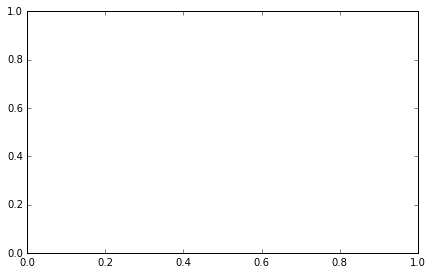

In [3]:
MyFigure, MyAxes = plt.subplots(1,1,figsize=(fsx,fsy))

In [13]:
def uf():
    MyGrid.Update()
    MyAxes.matshow(MyGrid['Value'])
    MyFigure

In [14]:
def af(n):
    uf()

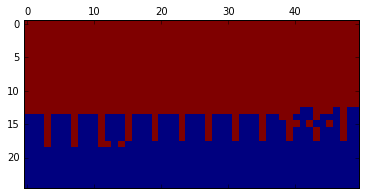

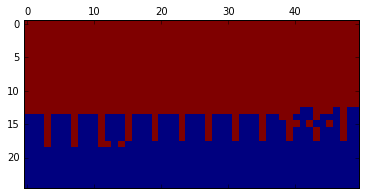

In [11]:
rows = 25
columns = 50
MyGrid=CAGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
MyGrid.SetValue()
MyGrid.SetBoundary()
MyFigure, MyAxes = plt.subplots()
MyAxes.matshow(MyGrid['State'])
MyFigure

In [26]:
AnimationFrames = 100  #total number of frames in animation.
DelayBetweenFrames = 33 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

The animation will be 3.3 seconds long.


In [23]:
af(1)

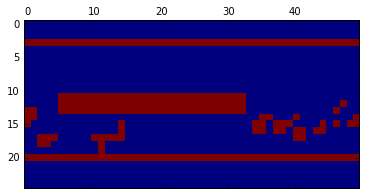

In [24]:
MyFigure

In [27]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation

<h2>Glider Example</h2>
<h3>Small Grid Example</h3>

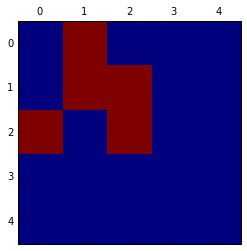

In [34]:
rows = 5
columns = 5
MyGrid=CAGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
numpy.copyto(MyGrid['State'],numpy.zeros((rows,columns),dtype=numpy.dtype(bool)))
MyGrid['State'][0][1] = True
MyGrid['State'][1][1] = True
MyGrid['State'][1][2] = True
MyGrid['State'][2][0] = True
MyGrid['State'][2][2] = True

MyGrid.SetValue()
MyGrid.SetBoundary()
MyFigure, MyAxes = plt.subplots()
MyAxes.matshow(MyGrid['State'])

In [35]:
AnimationFrames = 100  #total number of frames in animation.
DelayBetweenFrames = 33 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

The animation will be 3.3 seconds long.


In [36]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation

<h3>Large Grid Example</h3>

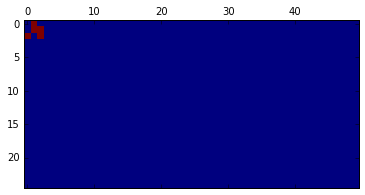

In [37]:
rows = 25
columns = 50
MyGrid=CAGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
numpy.copyto(MyGrid['State'],numpy.zeros((rows,columns),dtype=numpy.dtype(bool)))
MyGrid['State'][0][1] = True
MyGrid['State'][1][1] = True
MyGrid['State'][1][2] = True
MyGrid['State'][2][0] = True
MyGrid['State'][2][2] = True

MyGrid.SetValue()
MyGrid.SetBoundary()
MyFigure, MyAxes = plt.subplots()
MyAxes.matshow(MyGrid['State'])

In [38]:
AnimationFrames = 1000  #total number of frames in animation.
DelayBetweenFrames = 20 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

The animation will be 20.0 seconds long.


In [39]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation

<h2>Full Game of Life Simulations</h2>
<h3>Simulation 01</h3>

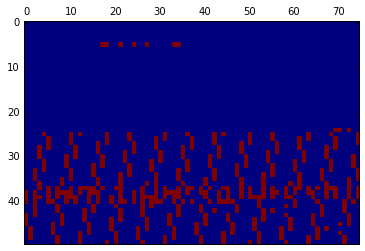

In [74]:
rows = 50
columns = 75
MyGrid=CAGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
MyGrid.SetValue()
MyGrid.SetBoundary()
MyFigure, MyAxes = plt.subplots()
MyAxes.matshow(MyGrid['State'])

In [75]:
AnimationFrames = 100  #total number of frames in animation.
DelayBetweenFrames = 33 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

The animation will be 3.3 seconds long.


In [76]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation

In [77]:
AnimationFrames = 500  #total number of frames in animation.
DelayBetweenFrames = 33 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

The animation will be 16.5 seconds long.


In [78]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation

<h3>Simulation 02</h3>

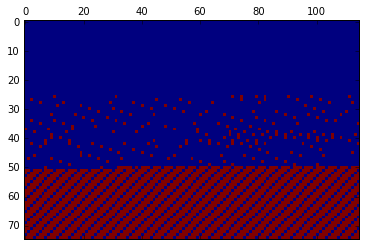

In [79]:
rows = 75
columns = 115
MyGrid=CAGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
MyGrid.SetValue()
MyGrid.SetBoundary()
MyFigure, MyAxes = plt.subplots()
MyAxes.matshow(MyGrid['State'])

In [81]:
AnimationFrames = 600  #total number of frames in animation.
DelayBetweenFrames = 33 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

The animation will be 19.8 seconds long.


In [82]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation